In [54]:
print("Week 6 Day 1")

Week 6 Day 1


In [55]:
import seaborn as sns 
import pandas as pd

# Load the Titanic dataset from seaborn
data = sns.load_dataset("titanic")

# Create a DataFrame from the loaded data
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
X = df[['age', 'fare', 'pclass']]
y = df['survived']


In [57]:
X.isnull().sum()

age       177
fare        0
pclass      0
dtype: int64

In [58]:
X['age'].fillna(X['age'].mean(), inplace=True)

/tmp/ipykernel_6608/66500479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)
/tmp/ipykernel_6608/66500479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].mean(), inplace=True)


In [59]:
X.isnull().sum()


age       0
fare      0
pclass    0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, X_train.shape)


(712, 3) (179, 3) (712,) (712, 3)


In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

acc_scr = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc_scr)

Accuracy score: 0.7039106145251397


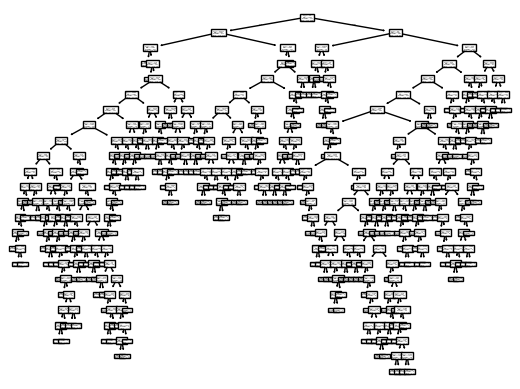

In [63]:
#  Visualization Of Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [64]:
param_grid = {
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10],
}



In [65]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [66]:
# Accuracy on each parameters 
print(grid_search.cv_results_['mean_test_score'])

[0.69649365 0.69649365 0.69649365 0.7176598  0.71625135 0.71764011
 0.66715257 0.66714272 0.67134837]


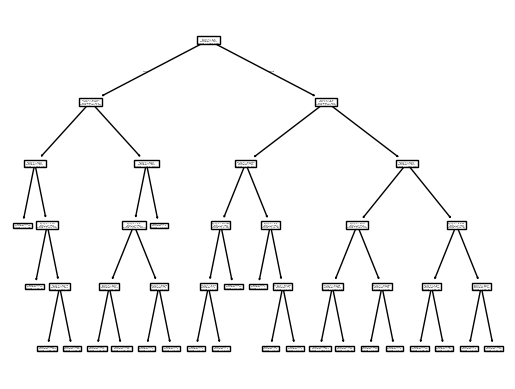

In [67]:
plot_tree(grid_search.best_estimator_)
plt.show()

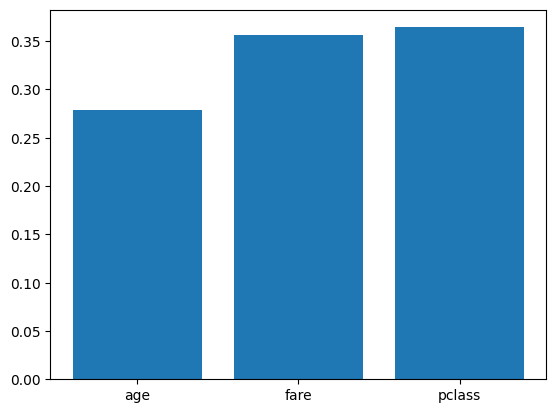

In [68]:
feature_importance = grid_search.best_estimator_.feature_importances_
plt.bar(X.columns, feature_importance)
plt.show()

In [69]:
data = pd.read_csv('../data/CarPrice_Assignment.csv')

df = pd.DataFrame(data)
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [71]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [72]:
x1 = df[['enginesize', 'horsepower', 'stroke']]
y1 = df[['price']]

x1.shape, y1.shape

((205, 3), (205, 1))

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(criterion='friedman_mse')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Mean Absolute Error: 2142.78
Mean Squared Error: 8876611.38


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming x and y are the feature and target variables
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}')

MAE: 0.34, MSE: 0.20, RMSE: 0.45


In [75]:
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [76]:
X = df[['age', 'fare', 'pclass']]
y = df[['survived']]



In [77]:
X.isnull().sum()

age       177
fare        0
pclass      0
dtype: int64

In [78]:
X['age'].fillna(X['age'].mean(), inplace=True)
X.isnull().sum()



/tmp/ipykernel_6608/2013797150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)
/tmp/ipykernel_6608/2013797150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].mean(), inplace=True)


age       0
fare      0
pclass    0
dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, criterion='gini')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")
print("Accuracy score: ",acc_score)


/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       105
           1       0.70      0.57      0.63        74

    accuracy                           0.72       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.72      0.72      0.71       179

Accuracy score:  0.7206703910614525


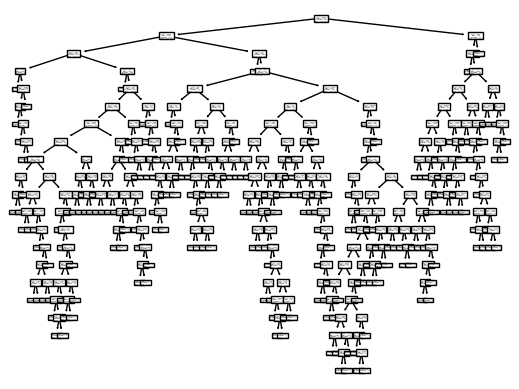

In [80]:
plot_tree(model.estimators_[0])
plt.show()

In [81]:
param_grid =  {
    
    'n_estimators': [50, 60, 70],
    'max_depth': [3,5,7],
    'min_samples_split': [2, 5, 10]
}

In [82]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(x_train, y_train)


/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 60, 70]},
             return_train_score=True, scoring='accuracy')

In [83]:
# Best Parameters

best_param = grid_search.best_params_
print("Best Parameters: ", best_param)

Best Parameters:  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [84]:
data = pd.read_csv('../data/CarPrice_Assignment.csv')
df = pd.DataFrame(data)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [85]:
X = df[['wheelbase', 'enginesize', 'highwaympg' ]]
y = df[['price']]


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 Score: 0.9489479528124086
MSE: 4030253.8791264812
MAE: 1481.3672323848239


In [87]:
param_grid =  {
    
    'n_estimators': [50, 60, 70],
    'max_depth': [3,5,7],
    'min_samples_split': [2, 5, 10]
}



In [88]:
from sklearn.model_selection import GridSearchCV

grid_search  = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)


/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='friedman_mse',
                                             random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 60, 70]},
             return_train_score=True, scoring='accuracy')

In [89]:
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df[['wheelbase', 'enginesize', 'highwaympg' ]]
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = KNeighborsRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


R2 Score: 0.8631621078524243
MSE: 10802533.414826559
MAE: 2321.273975609756


In [91]:
#  Data For Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
df = sns.load_dataset('iris')
df.head()
X = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y = df[['species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
c_r = classification_report(y_test, y_pred)

print(f"Classification Report:\n{c_r}")


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
data = sns.load_dataset('titanic')

df = pd.DataFrame(data)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [93]:
X = df[['age', 'pclass', 'fare']]
y = df[['survived']]

X.isnull().sum()

age       177
pclass      0
fare        0
dtype: int64

In [94]:
X['age'].fillna(X['age'].mean(), inplace=True)


/tmp/ipykernel_6608/2070561082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)
/tmp/ipykernel_6608/2070561082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].mean(), inplace=True)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c_r = classification_report(y_test, y_pred)

print(f"Classification Report:\n{c_r}")

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       105
           1       0.61      0.45      0.52        74

    accuracy                           0.65       179
   macro avg       0.64      0.62      0.62       179
weighted avg       0.65      0.65      0.64       179



/home/nak/miniconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [3]:
from pandas import DataFrame

data = {
    'Name': ['Elahi Bux', 'Meesam', 'Saqlain', 'Sabtain', 'Nadir','Asghar Ali'],
    'Age': [21, 22, 20, 21, 21, 22],
    'City': ['Nawabshah', 'Karachi', 'Hyderbad', "Nawabshah", 'Sukkur', 'Karachi']
}


df = DataFrame(data)

df.head()

,Name,Age,City
0,Elahi Bux,21,Nawabshah
1,Meesam,22,Karachi
2,Saqlain,20,Hyderbad
3,Sabtain,21,Nawabshah
4,Nadir,21,Sukkur


In [4]:
df[df['Age']== 21]

,Name,Age,City
0,Elahi Bux,21,Nawabshah
3,Sabtain,21,Nawabshah
4,Nadir,21,Sukkur
